In [33]:
image_raw[500,100,:]

array([129, 109,  84], dtype=uint8)

(1024, 1024, 3)


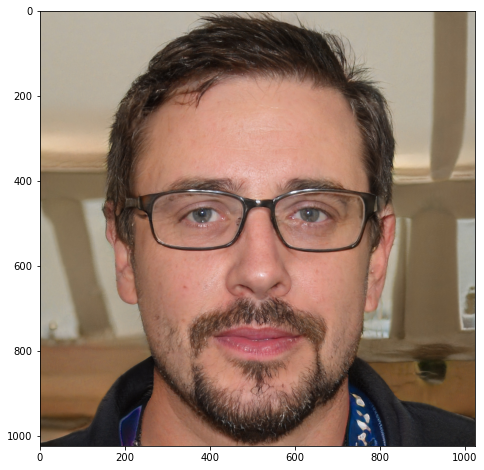

In [29]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("persona1.jpeg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)



(1024, 1024)
1.0


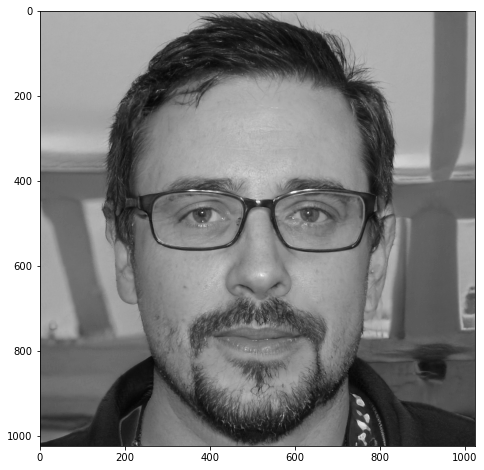

In [30]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [22]:
image_bw

array([[0.83798883, 0.86592179, 0.87430168, ..., 0.91899441, 0.89804469,
        0.8198324 ],
       [0.87290503, 0.86312849, 0.85893855, ..., 0.87709497, 0.88268156,
        0.88268156],
       [0.89106145, 0.86173184, 0.8603352 , ..., 0.88826816, 0.91061453,
        0.91899441],
       ...,
       [0.73044693, 0.72905028, 0.70391061, ..., 0.1075419 , 0.12011173,
        0.14944134],
       [0.71927374, 0.75977654, 0.70949721, ..., 0.09636872, 0.11592179,
        0.16480447],
       [0.69134078, 0.75139665, 0.7122905 , ..., 0.14106145, 0.15921788,
        0.21648045]])

Number of components explaining 95% variance: 19


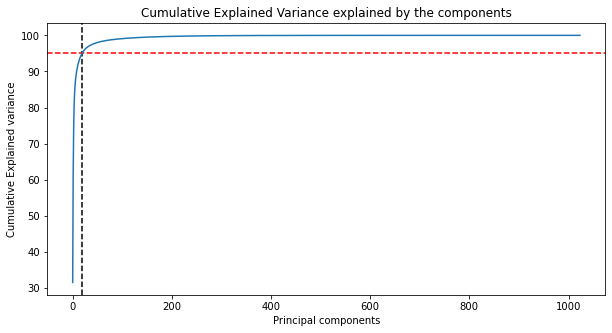

In [34]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

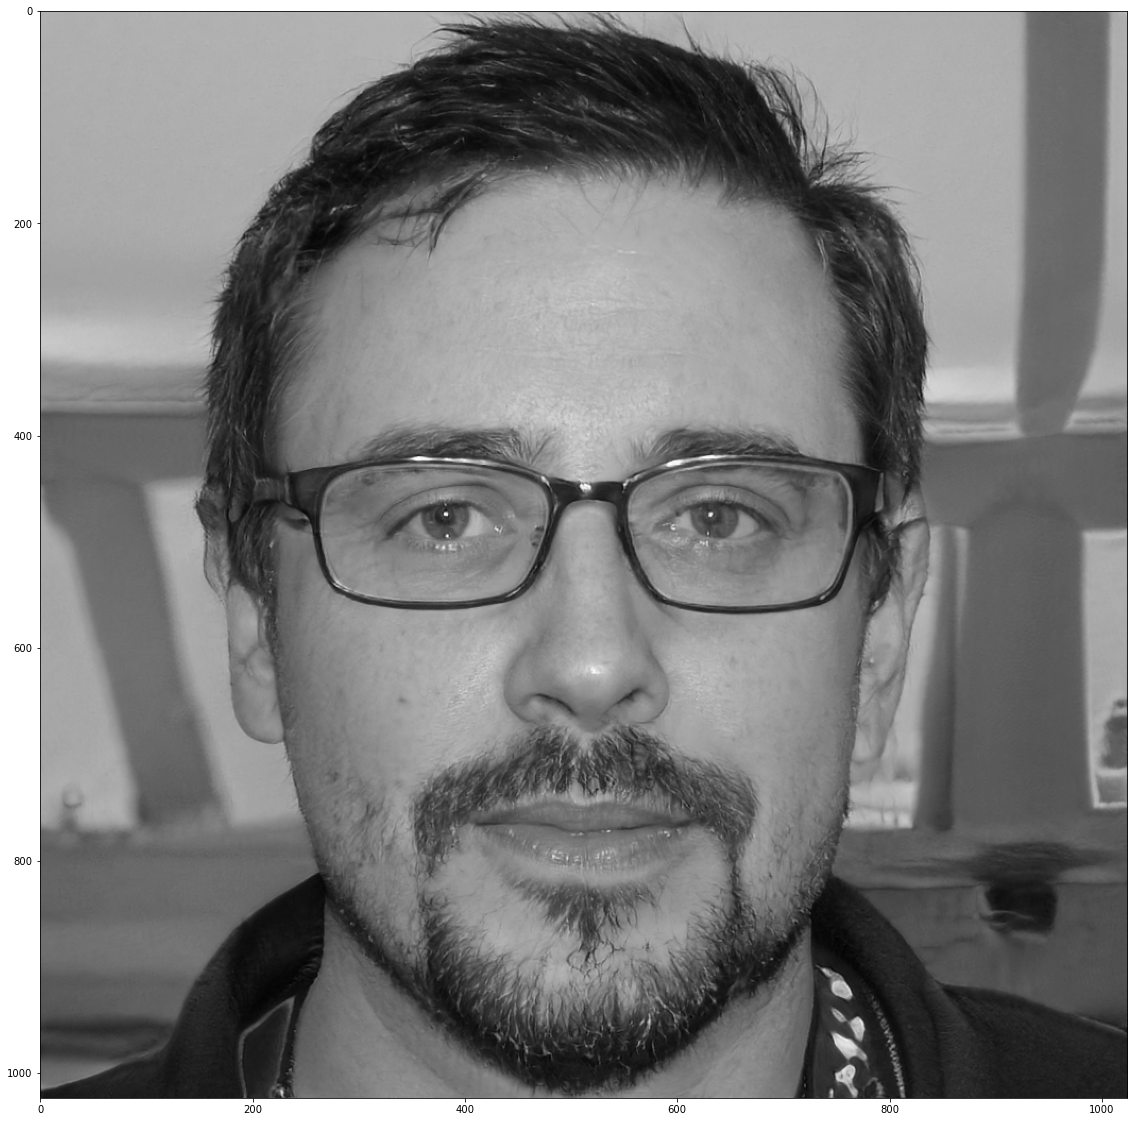

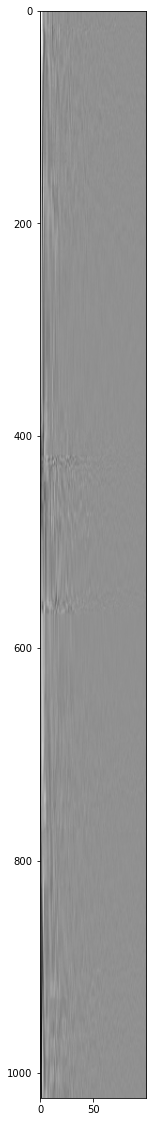

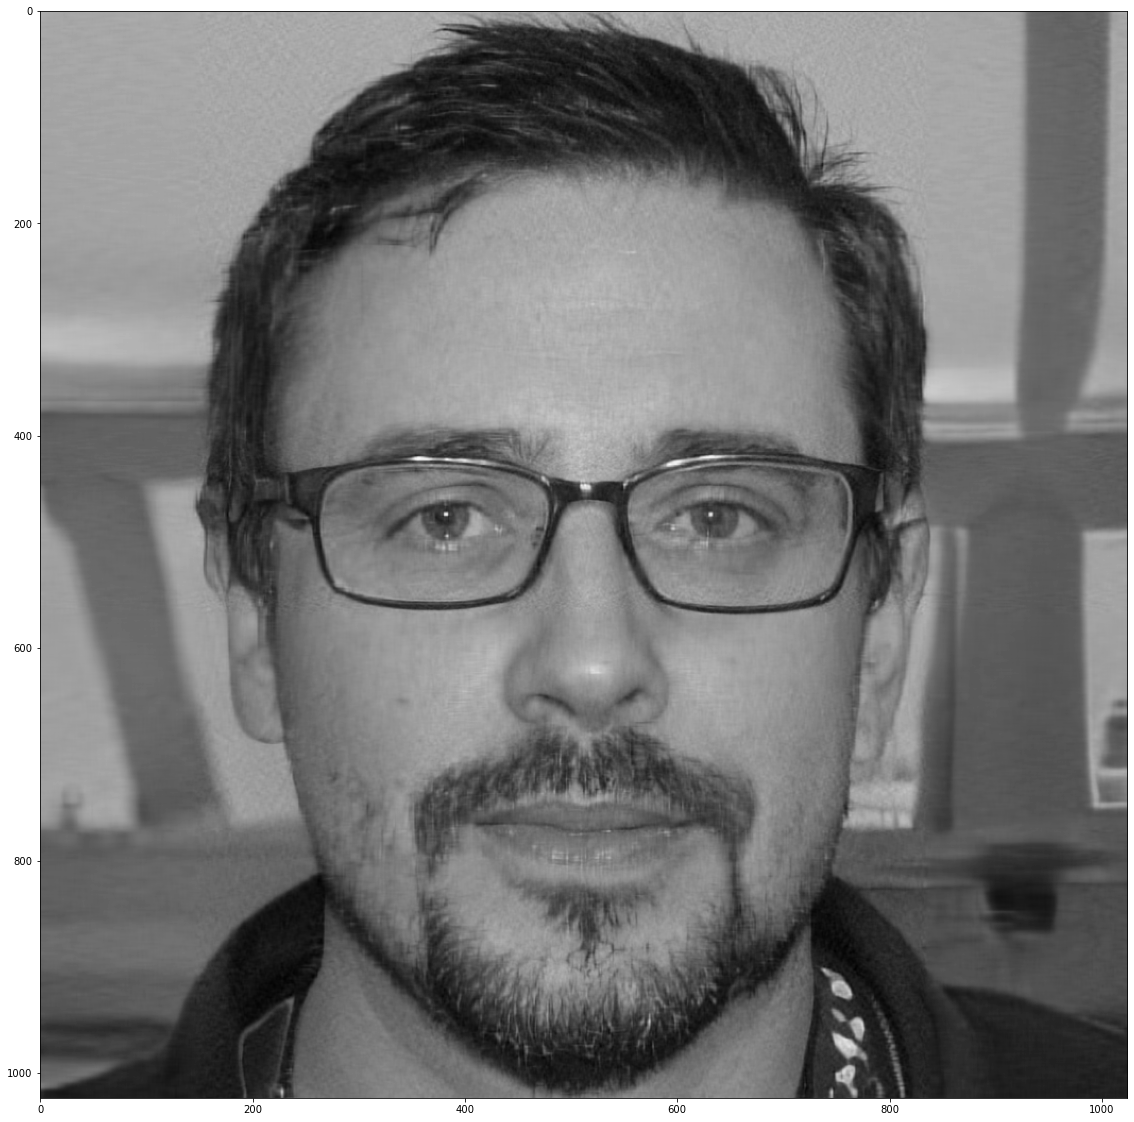

In [41]:
plt.figure(figsize=[20,20])
plt.imshow(image_bw,cmap = plt.cm.gray)
ipca = IncrementalPCA(n_components=100)
image_PCA = ipca.fit_transform(image_bw)
plt.figure(figsize=[20,20])
plt.imshow(image_PCA,cmap = plt.cm.gray)
image_recon = ipca.inverse_transform(image_PCA)
# Plotting the reconstructed image
plt.figure(figsize=[20,20])
plt.imshow(image_recon,cmap = plt.cm.gray)



In [25]:
ipca.components_

array([[ 0.01638338,  0.01565029,  0.01567765, ...,  0.04393986,
         0.04456307,  0.0434565 ],
       [ 0.02020822,  0.02059744,  0.020314  , ...,  0.03081187,
         0.03060855,  0.0297289 ],
       [ 0.01978354,  0.01754778,  0.01775475, ...,  0.00476846,
         0.00454875,  0.00426236],
       ...,
       [-0.00952706,  0.04966037,  0.01198512, ...,  0.01034496,
         0.01686222, -0.00217416],
       [-0.01811438,  0.03712898, -0.05897465, ..., -0.04795525,
         0.03421087,  0.00617865],
       [-0.0063811 ,  0.01220953, -0.03607472, ..., -0.00804771,
         0.01246853,  0.01771811]])

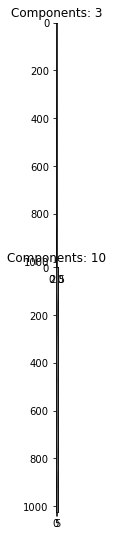

In [26]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.fit_transform(image_bw)
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [3, 10]

plt.figure(figsize=[20,9])

for i in range(2):
    plt.subplot(2,1,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

